In [1]:
import pandas as pd 

from google.colab import drive
drive.mount('/gdrive')
#Change current working directory to gdrive
%cd /gdrive

Mounted at /gdrive
/gdrive


In [2]:
#Read files
datafile = r'/gdrive/My Drive/Data Projects/Marketing Analytics/Lesson 5/retail_transactions.csv'
df = pd.read_csv(datafile) #creates a dataframe
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,546729,22775,PURPLE DRAWERKNOB ACRYLIC EDWARDIAN,12,2011-03-16 11:36:00,1.25,18231.0,United Kingdom
1,559898,21868,POTTING SHED TEA MUG,6,2011-07-13 12:18:00,1.25,16225.0,United Kingdom
2,548648,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-04-01 13:20:00,0.85,12949.0,United Kingdom
3,540543,22173,METAL 4 HOOK HANGER FRENCH CHATEAU,4,2011-01-09 15:23:00,2.95,14395.0,United Kingdom
4,561390,20726,LUNCH BAG WOODLAND,10,2011-07-27 09:52:00,1.65,17068.0,United Kingdom


In [3]:
df['InvoiceDate'].head()

0    2011-03-16 11:36:00
1    2011-07-13 12:18:00
2    2011-04-01 13:20:00
3    2011-01-09 15:23:00
4    2011-07-27 09:52:00
Name: InvoiceDate, dtype: object

Convert InvoiceDate column to date format

In [4]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [5]:
df['InvoiceDate'].head() #can see that dtype changed from object to datetime64

0   2011-03-16 11:36:00
1   2011-07-13 12:18:00
2   2011-04-01 13:20:00
3   2011-01-09 15:23:00
4   2011-07-27 09:52:00
Name: InvoiceDate, dtype: datetime64[ns]

Calculate the revenue for each row

In [6]:
df['revenue'] = df['UnitPrice'] * df['Quantity']

In [7]:
 df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,revenue
0,546729,22775,PURPLE DRAWERKNOB ACRYLIC EDWARDIAN,12,2011-03-16 11:36:00,1.25,18231.0,United Kingdom,15.0
1,559898,21868,POTTING SHED TEA MUG,6,2011-07-13 12:18:00,1.25,16225.0,United Kingdom,7.5
2,548648,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-04-01 13:20:00,0.85,12949.0,United Kingdom,20.4
3,540543,22173,METAL 4 HOOK HANGER FRENCH CHATEAU,4,2011-01-09 15:23:00,2.95,14395.0,United Kingdom,11.8
4,561390,20726,LUNCH BAG WOODLAND,10,2011-07-27 09:52:00,1.65,17068.0,United Kingdom,16.5


Combine by InvoiceNo

In [8]:
operations = {'revenue': 'sum', 
              'InvoiceDate': 'first', 
              'CustomerID': 'first'}

In [9]:
df = df.groupby('InvoiceNo').agg(operations)

In [10]:
df.head()

,revenue,InvoiceDate,CustomerID
InvoiceNo,,,
536365,139.12,2010-12-01 08:26:00,17850.0
536366,22.20,2010-12-01 08:28:00,17850.0
536367,278.73,2010-12-01 08:34:00,13047.0
536368,70.05,2010-12-01 08:34:00,13047.0
536369,17.85,2010-12-01 08:35:00,13047.0


Create a new column for the year

In [11]:
df['year'] = df['InvoiceDate'].apply(lambda x: x.year)

In [12]:
df.head()

,revenue,InvoiceDate,CustomerID,year
InvoiceNo,,,,
536365,139.12,2010-12-01 08:26:00,17850.0,2010
536366,22.20,2010-12-01 08:28:00,17850.0,2010
536367,278.73,2010-12-01 08:34:00,13047.0,2010
536368,70.05,2010-12-01 08:34:00,13047.0,2010
536369,17.85,2010-12-01 08:35:00,13047.0,2010


Calculate for each transaction how many days difference there is between the last dat of 2010 and the invoice date

In [13]:
df['days_since'] = (pd.datetime(year=2010, month=12, day=31) - df['InvoiceDate']).apply(lambda x: x.days)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """Entry point for launching an IPython kernel.


In [14]:
df.head()

,revenue,InvoiceDate,CustomerID,year,days_since
InvoiceNo,,,,,
536365,139.12,2010-12-01 08:26:00,17850.0,2010,29
536366,22.20,2010-12-01 08:28:00,17850.0,2010,29
536367,278.73,2010-12-01 08:34:00,13047.0,2010,29
536368,70.05,2010-12-01 08:34:00,13047.0,2010,29
536369,17.85,2010-12-01 08:35:00,13047.0,2010,29


Group by customer

In [15]:
# define a set of aggreation functions for each of our variables 
operations = {'revenue': 'sum', 
              'days_since': ['max', 'min', 'nunique'],}

In [16]:
#apply using groupby, only apply these functions to 2010 data since theyre the predictors
X = df[df['year'] == 2010].groupby('CustomerID').agg(operations)

In [17]:
X.head()

revenue days_since            
                sum        max min nunique
CustomerID                                
12347.0      711.79         23  23       1
12348.0      892.80         14  14       1
12370.0     1868.02         16  13       2
12377.0     1001.52         10  10       1
12383.0      600.72          8   8       1

Reset the names of the columns to make them easier to reference later

In [18]:
X.columns = [' '.join(col).strip() for col in X.columns.values]

X.head()

,revenue sum,days_since max,days_since min,days_since nunique
CustomerID,,,,
12347.0,711.79,23,23,1
12348.0,892.80,14,14,1
12370.0,1868.02,16,13,2
12377.0,1001.52,10,10,1
12383.0,600.72,8,8,1


Calculate average spend per order

In [19]:
X['avg_order_cost'] = X['revenue sum']/X['days_since nunique']

In [20]:
X['avg_order_cost']

CustomerID
12347.0     711.79
12348.0     892.80
12370.0     934.01
12377.0    1001.52
12383.0     600.72
            ...   
18239.0     438.10
18245.0     365.73
18259.0     376.30
18260.0     230.70
18269.0     168.60
Name: avg_order_cost, Length: 885, dtype: float64

In [21]:
print(X['avg_order_cost'].mean())

426.3558814366428


Now that the predictors are complete, need the outcome that will be predicting, which is the sum of revenue for 2011.

In [22]:
#groupby and store values as y
y = df[df['year']== 2011].groupby('CustomerID')['revenue'].sum()

Put predictors and outcomes into a single df called wrangled_df and rename the columns to more intuitive names 

In [23]:
wrangled_df = pd.concat([X, y], axis=1)

In [24]:
wrangled_df.head()

,revenue sum,days_since max,days_since min,days_since nunique,avg_order_cost,revenue
CustomerID,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,77183.60
12347.0,711.79,23.0,23.0,1.0,711.79,3598.21
12348.0,892.80,14.0,14.0,1.0,892.80,904.44
12349.0,NaN,NaN,NaN,NaN,NaN,1757.55
12350.0,NaN,NaN,NaN,NaN,NaN,334.40


In [25]:
#rename column titles with more intuitive names
wrangled_df.columns = ['2010 revenue',
                       'days_since_first_purchase',
                       'days_since_last_purchase',
                       'number_of_purchases',
                       'avg_order_cost',
                       '2011 revenue']

In [26]:
wrangled_df.head()

,2010 revenue,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,2011 revenue
CustomerID,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,77183.60
12347.0,711.79,23.0,23.0,1.0,711.79,3598.21
12348.0,892.80,14.0,14.0,1.0,892.80,904.44
12349.0,NaN,NaN,NaN,NaN,NaN,1757.55
12350.0,NaN,NaN,NaN,NaN,NaN,334.40


In [27]:
#drop data of customers not active in both years
wrangled_df = wrangled_df[~wrangled_df['2010 revenue'].isnull()]
wrangled_df = wrangled_df[~wrangled_df['2011 revenue'].isnull()]

In [28]:
wrangled_df.head()

,2010 revenue,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,2011 revenue
CustomerID,,,,,,
12347.0,711.79,23.0,23.0,1.0,711.79,3598.21
12348.0,892.80,14.0,14.0,1.0,892.80,904.44
12370.0,1868.02,16.0,13.0,2.0,934.01,1677.67
12377.0,1001.52,10.0,10.0,1.0,1001.52,626.60
12383.0,600.72,8.0,8.0,1.0,600.72,1249.84


In [29]:
wrangled_df.shape

(766, 6)

Get rid of outliers - any point that is more than 3 standard deviations above the median

In [30]:
wrangled_df = wrangled_df[wrangled_df['2011 revenue'] < ((wrangled_df['2011 revenue'].median()) + wrangled_df['2011 revenue'].std()*3)]
wrangled_df = wrangled_df[wrangled_df['2010 revenue'] < ((wrangled_df['2010 revenue'].median()) + wrangled_df['2010 revenue'].std()*3)]

Export to Excel

In [31]:
wrangled_df.to_csv('/gdrive/My Drive/Data Projects/Marketing Analytics/Lesson 5/Ex20_WrangledData.csv')

Visualize Data

In [32]:
import seaborn as sns
%matplotlib inline

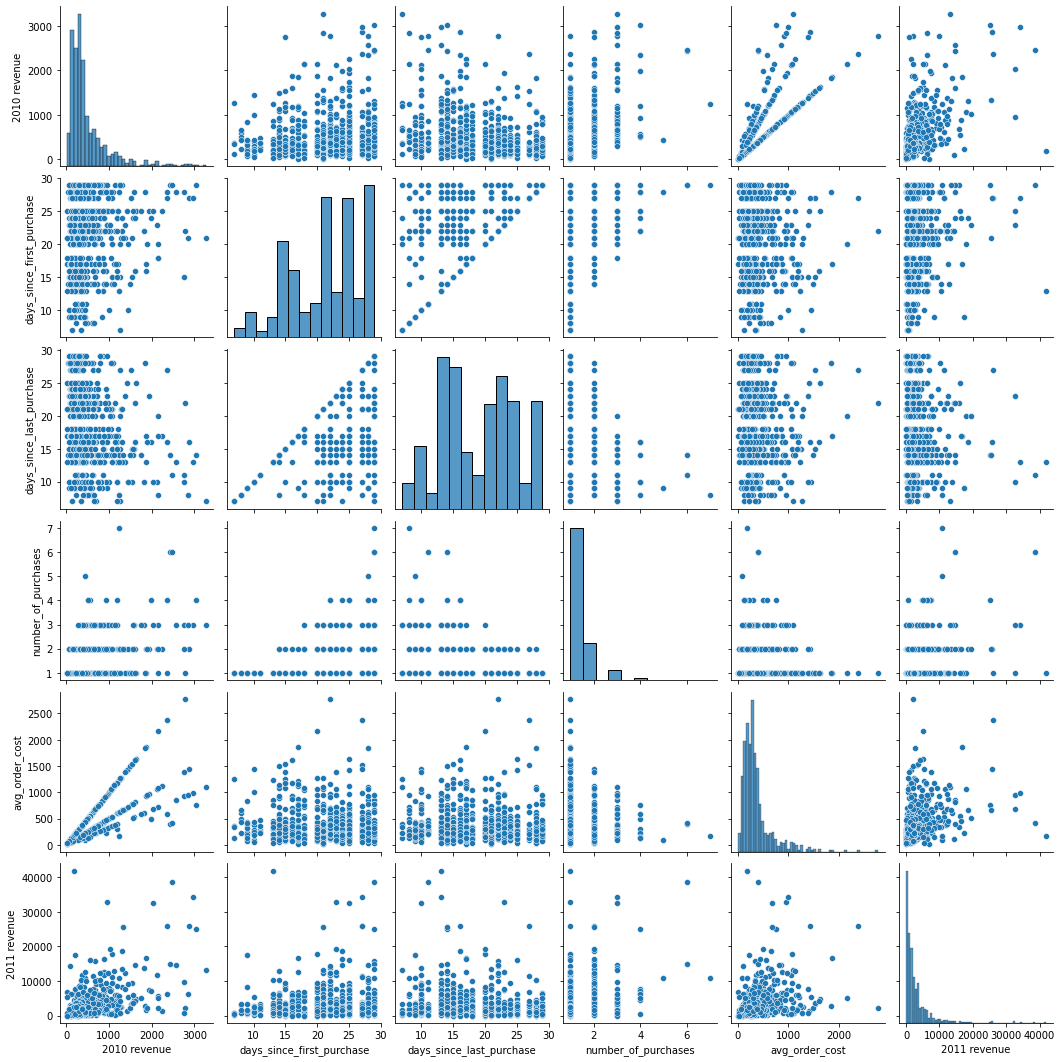

In [33]:
sns.pairplot(wrangled_df)

In [34]:
wrangled_df.corr()

,2010 revenue,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,2011 revenue
2010 revenue,1.000000,0.109692,-0.254964,0.504438,0.779401,0.548234
days_since_first_purchase,0.109692,1.000000,0.641574,0.327502,-0.074321,0.061743
days_since_last_purchase,-0.254964,0.641574,1.000000,-0.398268,-0.054051,-0.171294
number_of_purchases,0.504438,0.327502,-0.398268,1.000000,-0.012466,0.355751
avg_order_cost,0.779401,-0.074321,-0.054051,-0.012466,1.000000,0.357384
2011 revenue,0.548234,0.061743,-0.171294,0.355751,0.357384,1.000000


Correlation Observations: 


*   2010 Revenue is positively and strongly correlated to average order cost.
*  Days since last purchases is negatively correlated to the number of purchases - meaning the higher the number of days since a customer's last purchase, the lower the number of total purchases that will be made. 
* The number of purchases made strongly correlates to 2010 and 2011 revenue. 



In [36]:
#store predictors as x and outcome as y
#dont include days since first purchase because weak correlation to 2011 revenue

X = wrangled_df[['2010 revenue',
       'days_since_last_purchase',
       'number_of_purchases',
       'avg_order_cost'
       ]]
y = wrangled_df['2011 revenue']

Perform train test split

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

Create a Linear Regression Model

In [39]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
#examine model coefficients
model.coef_

array([  5.78799016,   7.47737544, 336.60769871,  -2.0558923 ])

In [41]:
#check the intercept term of the model
model.intercept_

264.8693265705956

Make a DataFrame that holds data for one customer: 

1. 2010 revenue, 1,000 
2. days since last purchase, 20
3. number of purchases, 2
4. average order cost, 500

Have the model make a prediction on this one customer's data.



In [43]:
single_customer = pd.DataFrame({
    '2010 revenue': [1000],
    'days_since_last_purchase': [20],
    'number_of_purchases': [2],
    'avg_order_cost': [500]
})

model.predict(single_customer)


array([5847.67624446])

*Predicted 2011 revenue for a customer with this data: $5,847.68*

Plot the model's prediction on the test set against the true value

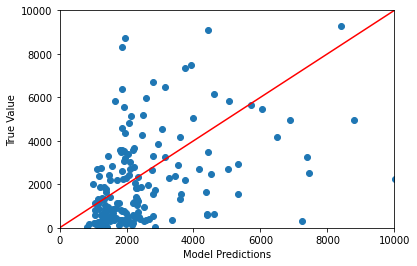

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(model.predict(X_test),y_test)
plt.xlim(0,10000)
plt.ylim(0,10000)
plt.plot([0, 10000], [0, 10000], 'k-', color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.show()

*Scatterplot: The model predictions plotted against the true values
Red line indicates where the points would be if the prediction was the same as the true value. The model is not completely accurate, but there does seem to be a relationship, with higher values having higher true values.*

Use correlation to further examine.

In [49]:
from scipy.stats.stats import pearsonr
pearsonr(model.predict(X_test), y_test)

(0.6125740076680494, 1.9340020674637274e-20)

*Correlation: 0.6 - strong relationship, p-value is very low indicating this relationship is unlikey to be due to chance.*